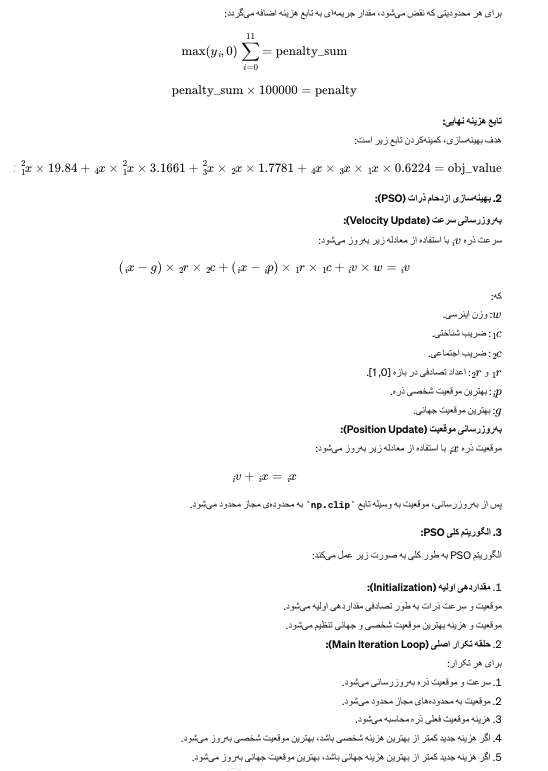

BOILER WITH PSO

Fitness of best solution in iteration 0 is 18633.533138
Fitness of best solution in iteration 10 is 6890.762871
Fitness of best solution in iteration 20 is 5992.628021
Fitness of best solution in iteration 30 is 5966.462992
Fitness of best solution in iteration 40 is 5962.760338
Fitness of best solution in iteration 50 is 5936.128143
Fitness of best solution in iteration 60 is 5931.108670
Fitness of best solution in iteration 70 is 5931.023632
Fitness of best solution in iteration 80 is 5930.762356
Fitness of best solution in iteration 90 is 5930.752493
Fitness of best solution in iteration 100 is 5928.472601
Fitness of best solution in iteration 110 is 5914.451664
Fitness of best solution in iteration 120 is 5914.092108
Fitness of best solution in iteration 130 is 5903.140826
Fitness of best solution in iteration 140 is 5901.971111


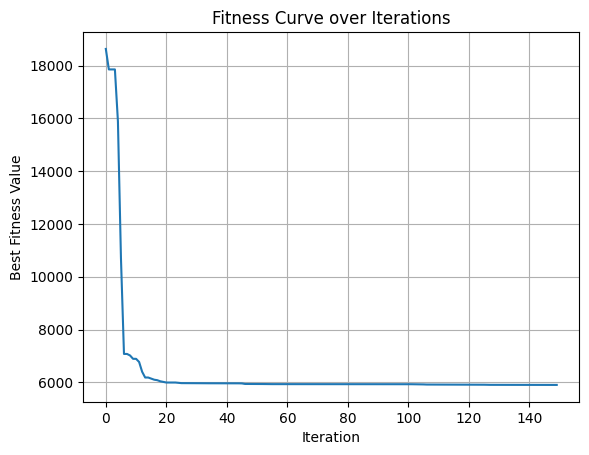

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of variables in the optimization problem
numberOfVariables = 4

# Define the minimum and maximum values for each variable
varmin = np.array([0, 0, 10, 10])
varmax = np.array([100, 100, 200, 200])

# Define the number of particles in the swarm
numberOfParticles = 100

# Define the number of iterations for the Particle Swarm Optimization
iterations = 150

# PSO parameters
w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive coefficient
c2 = 2.0  # Social coefficient

# Particle class definition
class Particle:
    def __init__(self):
        self.position = np.random.uniform(varmin, varmax, numberOfVariables)
        self.velocity = np.zeros(numberOfVariables)
        self.best_position = np.copy(self.position)
        self.best_cost = self.evaluate()

    def evaluate(self):
        return cost_function(self.position)

# Cost function as defined in the GA example
def cost_function(x):
    y = np.zeros(12)
    y[0] = -x[0] + 0.0193 * x[2]
    y[1] = -x[1] + 0.00954 * x[2]
    y[2] = -np.pi * x[2]**2 * x[3] - (4/3) * np.pi * x[2]**3 + 1296000
    y[3] = x[3] - 240
    y[4] = -x[0]
    y[5] = -x[1]
    y[6] = -x[2] + 10
    y[7] = -x[3] + 10
    y[8] = x[0] - 100
    y[9] = x[1] - 100
    y[10] = x[2] - 200
    y[11] = x[3] - 200
    penalty_sum = sum(max(i, 0) for i in y)
    penalty = 100000 * penalty_sum
    obj_value = 0.6224 * x[0] * x[2] * x[3] + 1.7781 * x[1] * x[2]**2 + 3.1661 * x[0]**2 * x[3] + 19.84 * x[0]**2 * x[2] + penalty
    return obj_value

# Initialize swarm
swarm = [Particle() for _ in range(numberOfParticles)]
global_best_position = np.copy(swarm[0].best_position)
global_best_cost = swarm[0].best_cost

# Update global best
for particle in swarm:
    if particle.best_cost < global_best_cost:
        global_best_position = np.copy(particle.best_position)
        global_best_cost = particle.best_cost

# PSO main loop
best_costs = []
for iteration in range(iterations):
    for particle in swarm:
        # Velocity update
        particle.velocity = w * particle.velocity \
                            + c1 * np.random.rand() * (particle.best_position - particle.position) \
                            + c2 * np.random.rand() * (global_best_position - particle.position)

        # Position update with bound handling
        particle.position += particle.velocity
        particle.position = np.clip(particle.position, varmin, varmax)

        # Evaluate new position
        current_cost = particle.evaluate()

        # Update personal best
        if current_cost < particle.best_cost:
            particle.best_position = np.copy(particle.position)
            particle.best_cost = current_cost

        # Update global best
        if current_cost < global_best_cost:
            global_best_position = np.copy(particle.position)
            global_best_cost = current_cost

    best_costs.append(global_best_cost)

    # Output details similar to your GA method
    if iteration % 10 == 0:
        print(f"Fitness of best solution in iteration {iteration} is {global_best_cost:.6f}")

# Plotting the results
plt.figure()
plt.plot(best_costs)
plt.title('Fitness Curve over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Best Fitness Value')
plt.grid(True)
plt.show()


PSO WITH GA

Fitness of best solution in iteration 0 is 136443.839381
Fitness of best solution in iteration 10 is 7700.892953
Fitness of best solution in iteration 20 is 6172.803206
Fitness of best solution in iteration 30 is 6126.043791
Fitness of best solution in iteration 40 is 6121.331820
Fitness of best solution in iteration 50 is 6118.321815
Fitness of best solution in iteration 60 is 6118.019969
Fitness of best solution in iteration 70 is 6118.003388
Fitness of best solution in iteration 80 is 6117.975575
Fitness of best solution in iteration 90 is 6117.958992
Fitness of best solution in iteration 100 is 6117.954876
Fitness of best solution in iteration 110 is 6117.953708
Fitness of best solution in iteration 120 is 6117.953146
Fitness of best solution in iteration 130 is 6084.672502
Fitness of best solution in iteration 140 is 6078.768971


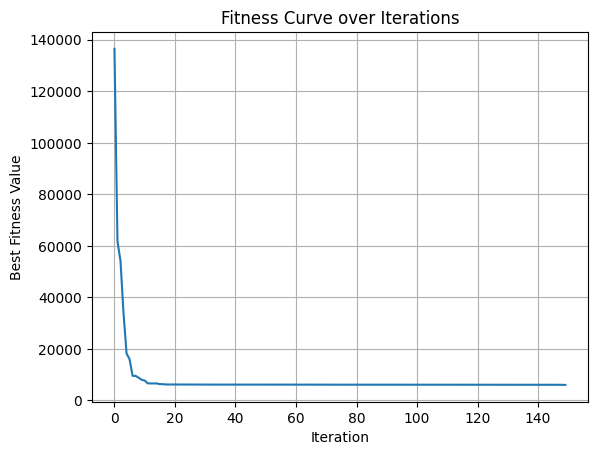

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of variables in the optimization problem
numberOfVariables = 4

# Define the minimum and maximum values for each variable
varmin = np.array([0, 0, 10, 10])
varmax = np.array([100, 100, 200, 200])

# Define the number of particles in the swarm
numberOfParticles = 100

# Define the number of iterations for the Particle Swarm Optimization
iterations = 150

# PSO parameters
w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive coefficient
c2 = 2.0  # Social coefficient

# Mutation and Crossover parameters
mutation_rate = 0.01  # Probability of mutation
mutation_strength = 0.1  # Mutation effect magnitude
crossover_rate = 0.05  # Probability of crossover

# Particle class definition
class Particle:
    def __init__(self):
        self.position = np.random.uniform(varmin, varmax, numberOfVariables)
        self.velocity = np.zeros(numberOfVariables)
        self.best_position = np.copy(self.position)
        self.best_cost = self.evaluate()

    def evaluate(self):
        return cost_function(self.position)

# Cost function as defined in the GA example
def cost_function(x):
    y = np.zeros(12)
    y[0] = -x[0] + 0.0193 * x[2]
    y[1] = -x[1] + 0.00954 * x[2]
    y[2] = -np.pi * x[2]**2 * x[3] - (4/3) * np.pi * x[2]**3 + 1296000
    y[3] = x[3] - 240
    y[4] = -x[0]
    y[5] = -x[1]
    y[6] = -x[2] + 10
    y[7] = -x[3] + 10
    y[8] = x[0] - 100
    y[9] = x[1] - 100
    y[10] = x[2] - 200
    y[11] = x[3] - 200
    penalty_sum = sum(max(i, 0) for i in y)
    penalty = 100000 * penalty_sum
    obj_value = 0.6224 * x[0] * x[2] * x[3] + 1.7781 * x[1] * x[2]**2 + 3.1661 * x[0]**2 * x[3] + 19.84 * x[0]**2 * x[2] + penalty
    return obj_value

# Initialize swarm
swarm = [Particle() for _ in range(numberOfParticles)]
global_best_position = np.copy(swarm[0].best_position)
global_best_cost = swarm[0].best_cost

# PSO main loop
best_costs = []
for iteration in range(iterations):
    for i, particle in enumerate(swarm):
        # Mutation
        if np.random.rand() < mutation_rate:
            particle.position += mutation_strength * np.random.normal(0, 1, numberOfVariables)
            particle.position = np.clip(particle.position, varmin, varmax)

        # Crossover
        if np.random.rand() < crossover_rate:
            partner_index = np.random.randint(0, numberOfParticles)
            partner = swarm[partner_index]
            particle.position = (particle.position + partner.position) / 2
            particle.position = np.clip(particle.position, varmin, varmax)

        # Velocity update
        particle.velocity = w * particle.velocity \
                            + c1 * np.random.rand() * (particle.best_position - particle.position) \
                            + c2 * np.random.rand() * (global_best_position - particle.position)

        # Position update with bound handling
        particle.position += particle.velocity
        particle.position = np.clip(particle.position, varmin, varmax)

        # Evaluate new position
        current_cost = particle.evaluate()

        # Update personal best
        if current_cost < particle.best_cost:
            particle.best_position = np.copy(particle.position)
            particle.best_cost = current_cost

        # Update global best
        if current_cost < global_best_cost:
            global_best_position = np.copy(particle.position)
            global_best_cost = current_cost

    best_costs.append(global_best_cost)

    # Output details similar to your GA method
    if iteration % 10 == 0:
        print(f"Fitness of best solution in iteration {iteration} is {global_best_cost:.6f}")

# Plotting the results
plt.figure()
plt.plot(best_costs)
plt.title('Fitness Curve over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Best Fitness Value')
plt.grid(True)
plt.show()


BOILER WITH GA

Fitness of best solution in generation 0 is 53838.694313
Fitness of best solution in generation 10 is 18240.084925
Fitness of best solution in generation 20 is 11003.082340
Fitness of best solution in generation 30 is 7759.853599
Fitness of best solution in generation 40 is 7737.600316
Fitness of best solution in generation 50 is 7313.293723
Fitness of best solution in generation 60 is 7310.848501
Fitness of best solution in generation 70 is 7310.848501
Fitness of best solution in generation 80 is 7310.848501
Fitness of best solution in generation 90 is 7310.848501
Fitness of best solution in generation 100 is 7017.655794
Fitness of best solution in generation 110 is 7017.655794
Fitness of best solution in generation 120 is 7017.655794
Fitness of best solution in generation 130 is 7016.761119
Fitness of best solution in generation 140 is 7016.761119


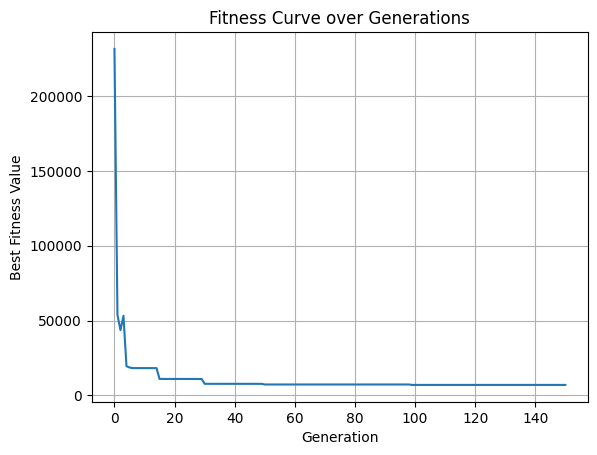

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of variables in the optimization problem
numberOfVariables = 4

# Define the minimum and maximum values for each variable
varmin = np.array([0, 0, 10, 10])
varmax = np.array([100, 100, 200, 200])

# Define the population size
population_size = 100

# Define the number of generations
generations = 150

# Mutation rate
mutation_rate = 0.2  # Increased for more exploration

# Crossover probability
crossover_rate = 0.8  # High crossover rate for better information exchange

# Tournament size for selection
tournament_size = 5

# Individual representation
class Individual:
    def __init__(self):
        self.position = np.random.uniform(varmin, varmax, numberOfVariables)
        self.cost = self.evaluate()

    def evaluate(self):
        return cost_function(self.position)

# Cost function
def cost_function(x):
    y = np.zeros(12)
    y[0] = -x[0] + 0.0193 * x[2]
    y[1] = -x[1] + 0.00954 * x[2]
    y[2] = -np.pi * x[2]**2 * x[3] - (4/3) * np.pi * x[2]**3 + 1296000
    y[3] = x[3] - 240
    y[4] = -x[0]
    y[5] = -x[1]
    y[6] = -x[2] + 10
    y[7] = -x[3] + 10
    y[8] = x[0] - 100
    y[9] = x[1] - 100
    y[10] = x[2] - 200
    y[11] = x[3] - 200
    penalty_sum = sum(max(i, 0) for i in y)
    penalty = 100000 * penalty_sum
    obj_value = 0.6224 * x[0] * x[2] * x[3] + 1.7781 * x[1] * x[2]**2 + 3.1661 * x[0]**2 * x[3] + 19.84 * x[0]**2 * x[2] + penalty
    return obj_value

# Initialize population
population = [Individual() for _ in range(population_size)]
best_solution = min(population, key=lambda ind: ind.cost)
best_costs = [best_solution.cost]

# Main GA loop
for generation in range(generations):
    new_population = []
    for _ in range(population_size // 2):  # Two children per pair of parents
        # Selection (Tournament)
        tournament = np.random.choice(population, tournament_size, replace=False)
        parent1 = min(tournament, key=lambda ind: ind.cost)
        tournament = np.random.choice(population, tournament_size, replace=False)
        parent2 = min(tournament, key=lambda ind: ind.cost)

        # Crossover
        if np.random.rand() < crossover_rate:
            cross_point = np.random.randint(1, numberOfVariables)
            child1_position = np.concatenate([parent1.position[:cross_point], parent2.position[cross_point:]])
            child2_position = np.concatenate([parent2.position[:cross_point], parent1.position[cross_point:]])
        else:
            child1_position = np.copy(parent1.position)
            child2_position = np.copy(parent2.position)

        child1 = Individual()
        child1.position = child1_position
        child2 = Individual()
        child2.position = child2_position

        # Mutation
        for child in [child1, child2]:
            if np.random.rand() < mutation_rate:
                mutation_idx = np.random.randint(0, numberOfVariables)
                child.position[mutation_idx] += np.random.normal(0, 20)  # Adjust mutation strength
                child.position = np.clip(child.position, varmin, varmax)
            child.cost = child.evaluate()

        new_population.extend([child1, child2])

    population = new_population
    current_best = min(population, key=lambda ind: ind.cost)
    best_costs.append(current_best.cost)

    if generation % 10 == 0:
        print(f"Fitness of best solution in generation {generation} is {current_best.cost:.6f}")

# Plotting the results
plt.figure()
plt.plot(best_costs)
plt.title('Fitness Curve over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.grid(True)
plt.show()


BOILER WITH PSO

Fitness of best solution in iteration 0 is 41439.872096
Fitness of best solution in iteration 10 is 7343.551435
Fitness of best solution in iteration 20 is 5943.741562
Fitness of best solution in iteration 30 is 5914.975681
Fitness of best solution in iteration 40 is 5891.958583
Fitness of best solution in iteration 50 is 5886.927481
Fitness of best solution in iteration 60 is 5885.430458
Fitness of best solution in iteration 70 is 5885.419352
Fitness of best solution in iteration 80 is 5885.343774
Fitness of best solution in iteration 90 is 5885.340967
Fitness of best solution in iteration 100 is 5885.333449
Fitness of best solution in iteration 110 is 5885.333188
Fitness of best solution in iteration 120 is 5885.332911
Fitness of best solution in iteration 130 is 5885.332855
Fitness of best solution in iteration 140 is 5885.332780


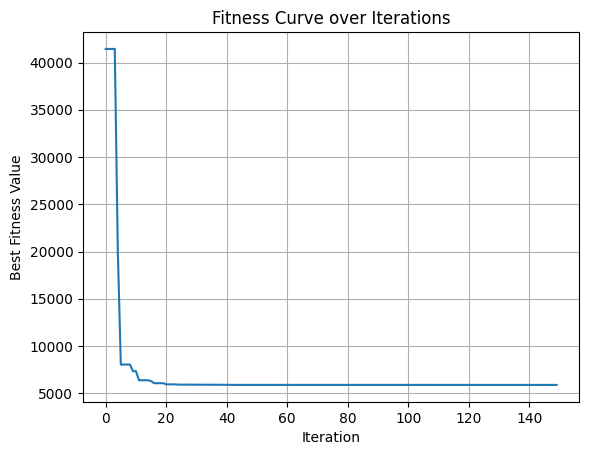

Final solution: [  0.77816864   0.38464916  40.31961873 200.        ]
Best fitness value: 5885.332776368778


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, position, velocity, best_position, best_cost):
        self.position = position
        self.velocity = velocity
        self.best_position = best_position
        self.best_cost = best_cost

def generate_particle(var_min, var_max, num_vars):
    position = np.random.uniform(var_min, var_max, num_vars)
    velocity = np.zeros(num_vars)
    best_position = np.copy(position)
    best_cost = evaluate_cost(best_position)
    return Particle(position, velocity, best_position, best_cost)

def evaluate_cost(x):
    constraints = np.zeros(12)
    constraints[0] = -x[0] + 0.0193 * x[2]
    constraints[1] = -x[1] + 0.00954 * x[2]
    constraints[2] = -np.pi * x[2]**2 * x[3] - (4/3) * np.pi * x[2]**3 + 1296000
    constraints[3] = x[3] - 240
    constraints[4] = -x[0]
    constraints[5] = -x[1]
    constraints[6] = -x[2] + 10
    constraints[7] = -x[3] + 10
    constraints[8] = x[0] - 100
    constraints[9] = x[1] - 100
    constraints[10] = x[2] - 200
    constraints[11] = x[3] - 200
    penalty_sum = sum(max(i, 0) for i in constraints)
    penalty = 100000 * penalty_sum
    objective_value = 0.6224 * x[0] * x[2] * x[3] + 1.7781 * x[1] * x[2]**2 + 3.1661 * x[0]**2 * x[3] + 19.84 * x[0]**2 * x[2] + penalty
    return objective_value

def update_velocity(particle, global_best_position, inertia_weight, cognitive_coefficient, social_coefficient):
    r1 = np.random.rand(len(particle.position))
    r2 = np.random.rand(len(particle.position))
    cognitive_velocity = cognitive_coefficient * r1 * (particle.best_position - particle.position)
    social_velocity = social_coefficient * r2 * (global_best_position - particle.position)
    particle.velocity = inertia_weight * particle.velocity + cognitive_velocity + social_velocity

def update_position(particle, var_min, var_max):
    particle.position += particle.velocity
    particle.position = np.clip(particle.position, var_min, var_max)

def evaluate_particle(particle):
    cost = evaluate_cost(particle.position)
    if cost < particle.best_cost:
        particle.best_position = np.copy(particle.position)
        particle.best_cost = cost
    return cost

def particle_swarm_optimization(num_particles, num_variables, var_min, var_max, num_iterations, inertia_weight, cognitive_coefficient, social_coefficient):
    swarm = [generate_particle(var_min, var_max, num_variables) for _ in range(num_particles)]
    global_best_position = np.copy(swarm[0].best_position)
    global_best_cost = swarm[0].best_cost

    for particle in swarm:
        if particle.best_cost < global_best_cost:
            global_best_position = np.copy(particle.best_position)
            global_best_cost = particle.best_cost

    best_costs = []

    for iteration in range(num_iterations):
        for particle in swarm:
            update_velocity(particle, global_best_position, inertia_weight, cognitive_coefficient, social_coefficient)
            update_position(particle, var_min, var_max)
            current_cost = evaluate_particle(particle)

            if current_cost < global_best_cost:
                global_best_position = np.copy(particle.position)
                global_best_cost = current_cost

        best_costs.append(global_best_cost)

        if iteration % 10 == 0:
            print(f"Fitness of best solution in iteration {iteration} is {global_best_cost:.6f}")

    plt.figure()
    plt.plot(best_costs)
    plt.title('Fitness Curve over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness Value')
    plt.grid(True)
    plt.show()

    return global_best_position, global_best_cost

# Example usage
number_of_variables = 4
var_min = np.array([0, 0, 10, 10])
var_max = np.array([100, 100, 200, 200])
num_particles = 100
num_iterations = 150
inertia_weight = 0.5
cognitive_coefficient = 1.5
social_coefficient = 2.0

best_solution, best_cost = particle_swarm_optimization(
    num_particles=num_particles,
    num_variables=number_of_variables,
    var_min=var_min,
    var_max=var_max,
    num_iterations=num_iterations,
    inertia_weight=inertia_weight,
    cognitive_coefficient=cognitive_coefficient,
    social_coefficient=social_coefficient
)

print("Final solution:", best_solution)
print("Best fitness value:", best_cost)


BOILER WITH GA


Fitness of best solution in generation 0 is 65920.243356
Fitness of best solution in generation 10 is 22670.362767
Fitness of best solution in generation 20 is 22284.880290
Fitness of best solution in generation 30 is 12905.490419
Fitness of best solution in generation 40 is 7293.293074
Fitness of best solution in generation 50 is 7293.293074
Fitness of best solution in generation 60 is 7293.293074
Fitness of best solution in generation 70 is 7275.638977
Fitness of best solution in generation 80 is 7198.106619
Fitness of best solution in generation 90 is 7198.106619
Fitness of best solution in generation 100 is 7198.106619
Fitness of best solution in generation 110 is 7196.346611
Fitness of best solution in generation 120 is 7196.346611
Fitness of best solution in generation 130 is 6757.209047
Fitness of best solution in generation 140 is 6757.209047


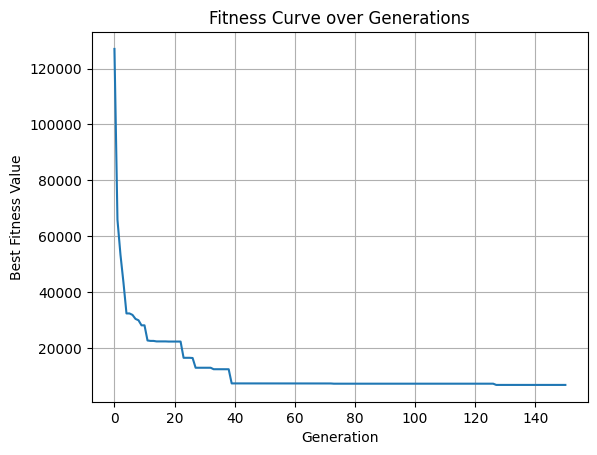

Final solution: [  0.99840188   0.4618431   47.01783717 123.92808849]
Fitness solution: 6757.2090472721075


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Solution:
    def __init__(self):
        self.position = []
        self.fitness = 0.0

def generate_solution(num_vars, var_min, var_max):
    sol = Solution()
    sol.position = np.random.uniform(var_min, var_max, num_vars)
    sol.fitness = evaluate_cost(sol.position)
    return sol

def evaluate_cost(x):
    constraints = np.zeros(12)
    constraints[0] = -x[0] + 0.0193 * x[2]
    constraints[1] = -x[1] + 0.00954 * x[2]
    constraints[2] = -np.pi * x[2]**2 * x[3] - (4/3) * np.pi * x[2]**3 + 1296000
    constraints[3] = x[3] - 240
    constraints[4] = -x[0]
    constraints[5] = -x[1]
    constraints[6] = -x[2] + 10
    constraints[7] = -x[3] + 10
    constraints[8] = x[0] - 100
    constraints[9] = x[1] - 100
    constraints[10] = x[2] - 200
    constraints[11] = x[3] - 200
    penalty_sum = sum(max(i, 0) for i in constraints)
    penalty = 100000 * penalty_sum
    objective_value = 0.6224 * x[0] * x[2] * x[3] + 1.7781 * x[1] * x[2]**2 + 3.1661 * x[0]**2 * x[3] + 19.84 * x[0]**2 * x[2] + penalty
    return objective_value

def tournament_selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    return min(tournament, key=lambda ind: ind.fitness)

def crossover(parent1, parent2, crossover_rate, num_vars):
    if random.random() < crossover_rate:
        cross_point = random.randint(1, num_vars - 1)
        child1_position = np.concatenate([parent1.position[:cross_point], parent2.position[cross_point:]])
        child2_position = np.concatenate([parent2.position[:cross_point], parent1.position[cross_point:]])
    else:
        child1_position = np.copy(parent1.position)
        child2_position = np.copy(parent2.position)

    child1 = Solution()
    child1.position = child1_position
    child2 = Solution()
    child2.position = child2_position
    return child1, child2

def mutate(solution, mutation_rate, var_min, var_max):
    if random.random() < mutation_rate:
        mutation_idx = random.randint(0, len(solution.position) - 1)
        solution.position[mutation_idx] += np.random.normal(0, 20)
        solution.position = np.clip(solution.position, var_min, var_max)
    solution.fitness = evaluate_cost(solution.position)
    return solution

def genetic_algorithm(num_vars, var_min, var_max, population_size, generations, mutation_rate, crossover_rate, tournament_size):
    population = [generate_solution(num_vars, var_min, var_max) for _ in range(population_size)]
    best_solution = min(population, key=lambda ind: ind.fitness)
    best_fitness_values = [best_solution.fitness]

    for generation in range(generations):
        new_population = []

        for _ in range(population_size // 2):  # Two children per pair of parents
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)
            child1, child2 = crossover(parent1, parent2, crossover_rate, num_vars)

            child1 = mutate(child1, mutation_rate, var_min, var_max)
            child2 = mutate(child2, mutation_rate, var_min, var_max)

            new_population.extend([child1, child2])

        population = new_population
        current_best = min(population, key=lambda ind: ind.fitness)
        best_fitness_values.append(current_best.fitness)

        if generation % 10 == 0:
            print(f"Fitness of best solution in generation {generation} is {current_best.fitness:.6f}")

    plt.figure()
    plt.plot(best_fitness_values)
    plt.title('Fitness Curve over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness Value')
    plt.grid(True)
    plt.show()

    return min(population, key=lambda ind: ind.fitness)

# Example usage
number_of_variables = 4
var_min = np.array([0, 0, 10, 10])
var_max = np.array([100, 100, 200, 200])
population_size = 100
generations = 150
mutation_rate = 0.2
crossover_rate = 0.8
tournament_size = 5

best_individual = genetic_algorithm(
    num_vars=number_of_variables,
    var_min=var_min,
    var_max=var_max,
    population_size=population_size,
    generations=generations,
    mutation_rate=mutation_rate,
    crossover_rate=crossover_rate,
    tournament_size=tournament_size
)

print("Final solution:", best_individual.position)
print("Fitness solution:", best_individual.fitness)
